In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### LDA

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique and a classification algorithm. It's commonly used for feature extraction and classification tasks, especially when dealing with multi-class classification problems. LDA aims to find a linear combination of features that characterizes or separates two or more classes in the dataset. Here's a detailed explanation of LDA, including its steps, working principle, advantages, and disadvantages:

##### Steps Involved in LDA:

Standardization: If the features have different scales, it's essential to standardize them (subtracting the mean and dividing by the standard deviation) to ensure that each feature contributes equally to the analysis.

Compute Class Means: Calculate the mean feature vectors for each class in the dataset.

Compute Within-Class Scatter Matrix: Compute the scatter matrix for each class, which measures the spread of data points within each class. Then, sum these scatter matrices to obtain the within-class scatter matrix.

Compute Between-Class Scatter Matrix: Calculate the scatter matrix between classes, which measures the spread of class means around the overall mean.

Compute Eigenvectors and Eigenvalues: Perform eigendecomposition on the matrix composed of the inverse of the within-class scatter matrix multiplied by the between-class scatter matrix. This results in eigenvectors and corresponding eigenvalues.

Select Discriminative Features: Select the top k eigenvectors (linear discriminants) corresponding to the k largest eigenvalues to form a transformation matrix.

Project Data onto New Feature Space: Project the original data onto the new feature space spanned by the selected linear discriminants.

##### Working Principle of LDA:

The main idea behind LDA is to find a projection that maximizes the separation between classes while minimizing the scatter within each class. It achieves this by maximizing the ratio of between-class scatter to within-class scatter. In other words, LDA seeks to find a lower-dimensional subspace where the classes are well-separated while maintaining compactness within each class.

##### Advantages of LDA:

Dimensionality Reduction: LDA reduces the dimensionality of the dataset while preserving most of the discriminatory information. It can transform high-dimensional data into a lower-dimensional space, making it easier to visualize and analyze.

Optimal for Classification: LDA is an optimal linear classifier when the classes are well-separated and Gaussian distributed. It provides a clear decision boundary and performs well in multi-class classification tasks.

##### Disadvantages of LDA:

Sensitive to Outliers: LDA is sensitive to outliers in the data, as it tries to minimize the scatter within each class. Outliers can significantly affect the estimation of class means and scatter matrices, leading to suboptimal results.

Assumes Gaussian Distribution: LDA assumes that the features are normally distributed within each class. If this assumption is violated, LDA may not perform well and other methods like Quadratic Discriminant Analysis (QDA) may be more appropriate.

#### LDA Code

Explained Variance by LD1: 0.9912126049653672
Explained Variance by LD2: 0.008787395034632786


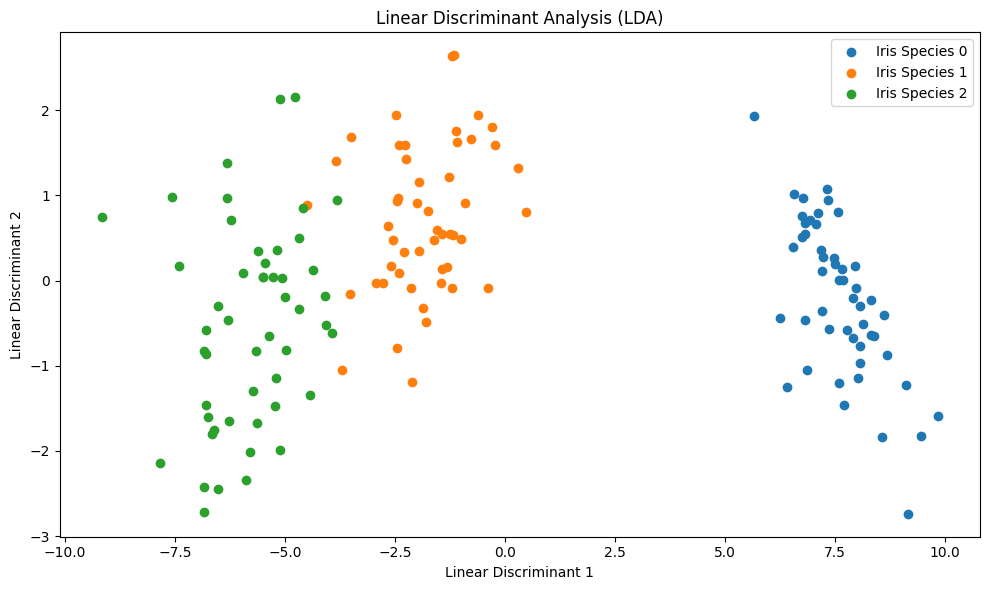

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform LDA
lda = LDA()
X_lda = lda.fit_transform(X_scaled, y)

# Explained variance by LD1 and LD2
explained_variance_ld1 = lda.explained_variance_ratio_[0]
explained_variance_ld2 = lda.explained_variance_ratio_[1]
print(f"Explained Variance by LD1: {explained_variance_ld1}")
print(f"Explained Variance by LD2: {explained_variance_ld2}")

# Plot the first two linear discriminants
plt.figure(figsize=(10, 6))
for target_class in np.unique(y):
    plt.scatter(X_lda[y == target_class, 0], X_lda[y == target_class, 1], label=f'Iris Species {target_class}')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('Linear Discriminant Analysis (LDA)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()